In [105]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df=pd.read_csv("C:/Users/PC/02_Forward School/Capstone Project-Alcon Marshall/00_Datasets/03 Crop Production/crops_state.csv")

In [127]:
df

,state,date,crop_type,planted_area,production,year
0,Malaysia,2017-01-01,cash_crops,20763.1,217847.5,2017
1,Malaysia,2018-01-01,cash_crops,19028.2,215087.6,2018
2,Malaysia,2019-01-01,cash_crops,17082.0,221310.2,2019
3,Malaysia,2020-01-01,cash_crops,19090.9,223506.8,2020
4,Malaysia,2021-01-01,cash_crops,20070.3,239011.9,2021
...,...,...,...,...,...,...
859,W.P. Labuan,2018-01-01,vegetables,72.5,333.4,2018
860,W.P. Labuan,2019-01-01,vegetables,57.1,334.0,2019
861,W.P. Labuan,2020-01-01,vegetables,26.9,358.9,2020
862,W.P. Labuan,2021-01-01,vegetables,65.1,462.2,2021


In [117]:
print(df["date"].unique())

['2017-01-01' '2018-01-01' '2019-01-01' '2020-01-01' '2021-01-01'
 '2022-01-01']


In [119]:
print(df["crop_type"].unique())

['cash_crops' 'coconut' 'flower' 'fruits' 'herbs' 'industrial_crops'
 'paddy' 'spices' 'vegetables']


In [121]:
print(df["state"].unique())

['Malaysia' 'Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Perak' 'Perlis' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur' 'W.P. Labuan']


# Total Production of Each Crop Type

In [160]:
total_production_by_crop = (
    df.groupby("crop_type")["production"]
    .sum()
    .round(0)
    .reset_index()
    .sort_values(by="production", ascending=False)
)

total_production_by_crop.columns = ["Crop Type", "Total Production (MT)"]
display(total_production_by_crop.style.format({"Total Production (MT)": "{:,.0f}"}).set_caption("Total Production by Crop Type"))

,Crop Type,Total Production (MT)
2,flower,"5,323,182,789"
6,paddy,"29,284,626"
3,fruits,"19,323,194"
8,vegetables,"12,607,783"
5,industrial_crops,"8,552,001"
1,coconut,"6,536,853"
0,cash_crops,"2,664,793"
7,spices,"654,593"
4,herbs,"123,036"


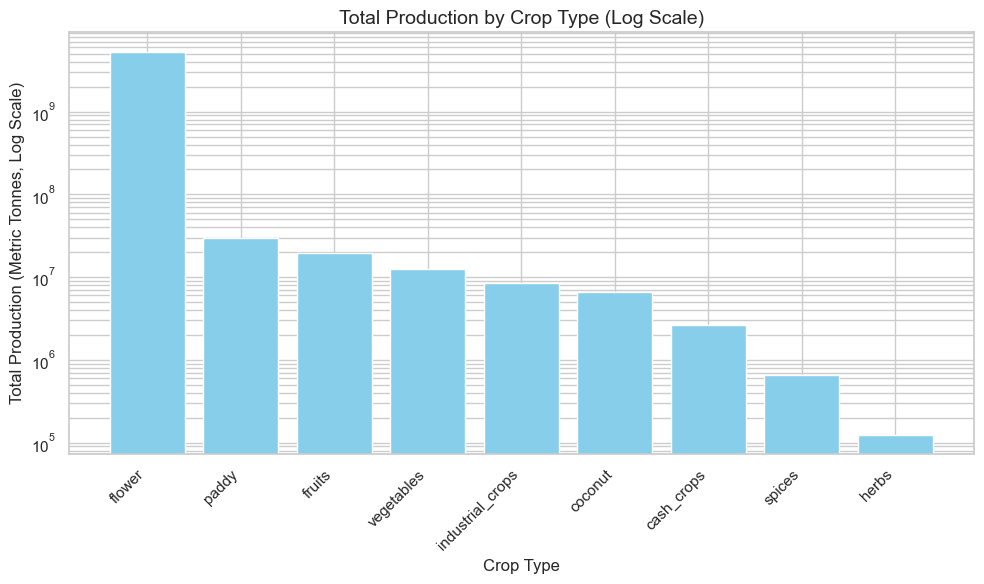

In [210]:
plt.figure(figsize=(10, 6))
plt.bar(plot_data["Crop Type"], plot_data["Total Production (MT)"], color='skyblue')
plt.yscale("log")
plt.title("Total Production by Crop Type (Log Scale)", fontsize=14)
plt.xlabel("Crop Type")
plt.ylabel("Total Production (Metric Tonnes, Log Scale)")
plt.xticks(rotation=45, ha='right')
plt.grid(True, which="both", axis='y')
plt.tight_layout()
plt.show()

# State Crop Production Activity (2017–2022)

In [ ]:
import plotly.express as px

# Filter out the "Malaysia" national total
state_only_data = production_by_state_year[production_by_state_year["State"] != "Malaysia"]

# Create interactive bar chart
fig = px.bar(
    state_only_data,
    x="Production (MT)",
    y="State",
    color="Year",
    orientation='h',
    title="Crop Production by State and Year (2017–2022)",
    hover_data=["Year", "Production (MT)"]
)

# Update layout
fig.update_layout(
    barmode='group',
    height=800,
    xaxis_title="Production (Metric Tonnes)",
    yaxis_title="State"
)

fig.show()

# States Ranked by Total Production (High to Low)

In [198]:
# Filter out national total
state_only_production = df[df["state"] != "Malaysia"]

# Group by state, sum, round, and sort
total_production_by_state_only = (
    state_only_production.groupby("state")["production"]
    .sum()
    .round(0)
    .reset_index()
    .sort_values(by="production", ascending=False)
     .reset_index(drop=True)
)

# Rename columns for clarity
total_production_by_state_only.columns = ["State", "Total Production (MT)"]

# Display rich table
from IPython.display import display
display(
    total_production_by_state_only
    .style
    .format({"Total Production (MT)": "{:,.0f}"})
    .set_caption("Total Crop Production by State (Excluding Malaysia National Total)")
)


,State,Total Production (MT)
0,Johor,"1,282,211,161"
1,Pahang,"745,419,043"
2,Selangor,"348,945,538"
3,Perak,"189,306,188"
4,Sabah,"46,546,950"
5,Kelantan,"30,424,055"
6,Negeri Sembilan,"19,664,287"
7,Sarawak,"10,562,378"
8,Kedah,"10,428,015"
9,W.P. Kuala Lumpur,"5,395,352"


# Malaysias Total Production Over 5 years

In [196]:
# Filter to include only rows where state is "Malaysia"
malaysia_total = df[df["state"] == "Malaysia"]

# Group by year and sum production
malaysia_production_by_year = (
    malaysia_total.groupby("year")["production"]
    .sum()
    .round(0)
    .reset_index()
)

# Rename columns
malaysia_production_by_year.columns = ["Year", "Total Production (MT)"]

# Display as a clean table
from IPython.display import display
display(
    malaysia_production_by_year
    .style
    .format({"Total Production (MT)": "{:,.0f}"})
    .set_caption("Total Crop Production in Malaysia by Year (2017–2022)")
)

,Year,Total Production (MT)
0,2017,"515,718,553"
1,2018,"524,793,589"
2,2019,"534,604,609"
3,2020,"408,908,652"
4,2021,"355,116,870"
5,2022,"362,322,214"


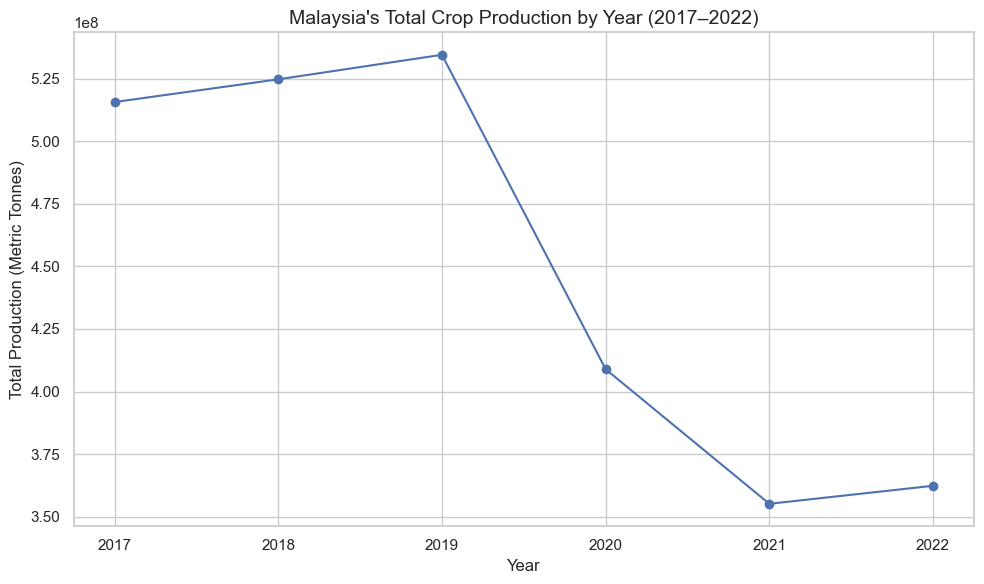

In [202]:
# Ensure you have this DataFrame from earlier
# malaysia_production_by_year = ...

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(malaysia_production_by_year["Year"], malaysia_production_by_year["Total Production (MT)"], marker='o', linestyle='-')
plt.title("Malaysia's Total Crop Production by Year (2017–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Production (Metric Tonnes)")
plt.grid(True)
plt.tight_layout()
plt.show()
